In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import requests
import json
from bs4 import BeautifulSoup as soup
import matplotlib.cm as cm
import matplotlib.colors as clr
%matplotlib inline
print('packages installed')

packages installed


In [3]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [4]:
# retrieve neighbourhood data from Wikipedia and transform into readable dataframe

link = 'https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto'
ext = requests.get(link)
nh_data = soup(ext.content)
content = soup(str(nh_data))
nh_table = content.find('table',{'class':'wikitable sortable'})
str_table = str(nh_table.extract())

In [5]:
# reading the table 

df = pd.read_html(str_table)[0]
df.head()

CDN number City-designated neighbourhood  Former city/borough  \
0         129               Agincourt North          Scarborough   
1         128  Agincourt South-Malvern West          Scarborough   
2          20                     Alderwood            Etobicoke   
3          95                         Annex  Old City of Toronto   
4          42             Banbury-Don Mills           North York   

         Neighbourhoods covered  Map  Unnamed: 5  
0        Agincourt and Brimwood  NaN         NaN  
1         Agincourt and Malvern  NaN         NaN  
2                     Alderwood  NaN         NaN  
3  The Annex and Seaton Village  NaN         NaN  
4                     Don Mills  NaN         NaN

In [6]:
list(df.columns)

['CDN number',
 'City-designated neighbourhood',
 'Former city/borough',
 'Neighbourhoods covered',
 'Map',
 'Unnamed: 5']

In [7]:
# drop the last 3 columns as they are not needed

df_drop = df.drop(['Neighbourhoods covered', 'Map', 'Unnamed: 5'], axis =1)

In [8]:
df_drop

CDN number      City-designated neighbourhood  Former city/borough
0           129                    Agincourt North          Scarborough
1           128       Agincourt South-Malvern West          Scarborough
2            20                          Alderwood            Etobicoke
3            95                              Annex  Old City of Toronto
4            42                  Banbury-Don Mills           North York
5            34                     Bathurst Manor           North York
6            76                Bay Street Corridor  Old City of Toronto
7            52                    Bayview Village           North York
8            49              Bayview Woods-Steeles           North York
9            39               Bedford Park-Nortown           North York
10          112            Beechborough-Greenbrook                 York
11          127                            Bendale          Scarborough
12          122              Birchcliffe-Cliffside          Scarborough
13           24                        Black Creek           North York
14           69                        Blake-Jones  Old City of Toronto
15          108               Briar Hill-Belgravia                 York
16           41  Bridle Path-Sunnybrook-York Mills           North York
17           57                    Broadview North            East York
18           30                Brookhaven-Amesbury           North York
19           71   Cabbagetown-South St. James Town  Old City of Toronto
20          109                 Caledonia-Fairbank                 York
21           96                          Casa Loma  Old City of Toronto
22          133             Centennial Scarborough          Scarborough
23           75              Church-Yonge Corridor  Old City of Toronto
24          120                Clairlea-Birchmount          Scarborough
25           33                       Clanton Park           North York
26          123                         Cliffcrest          Scarborough
27           92             Corso Italia-Davenport  Old City of Toronto
28           61                      Crescent Town            East York
29           59               Danforth - East York            East York
..          ...                                ...                  ...
110          70                    South Riverdale  Old City of Toronto
111          85                     South Parkdale  Old City of Toronto
112          40              St. Andrew-Windfields           North York
113         116                            Steeles          Scarborough
114          16                Stonegate-Queensway            Etobicoke
115         118             Tam O'Shanter-Sullivan          Scarborough
116          63                        The Beaches  Old City of Toronto
117           3       Thistletown-Beaumond Heights            Etobicoke
118          55                   Thorncliffe Park            East York
119          81                  Trinity-Bellwoods  Old City of Toronto
120          79                         University  Old City of Toronto
121          43                   Victoria Village           North York
122          77  Waterfront Communities-The Island  Old City of Toronto
123         136                          West Hill          Scarborough
124           1             West Humber-Clairville            Etobicoke
125          35                Westminster-Branson           North York
126         113                             Weston                 York
127          91                 Weston-Pellam Park  Old City of Toronto
128         119                   Wexford-Maryvale          Scarborough
129          51                    Willowdale East           North York
130          37                    Willowdale West           North York
131           7   Willowridge-Martingrove-Richview            Etobicoke
132         137                             Woburn          Scarborough
133          64                  Woodbine Cor

In [9]:
df_drop.rename(columns={'City-designated neighbourhood' : 'Neighborhood', 'Former city/borough' : 'borough'}, inplace=True)

In [10]:
df_drop.head()

CDN number                  Neighborhood              borough
0         129               Agincourt North          Scarborough
1         128  Agincourt South-Malvern West          Scarborough
2          20                     Alderwood            Etobicoke
3          95                         Annex  Old City of Toronto
4          42             Banbury-Don Mills           North York

In [11]:
#import Toronto neighbourhood profiles
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_654b62cd132445baa25e0a3d7bcdca8d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rMmuh4ZOugz-MjEcJdFVAEBzsTkoyKdb1pa2YvCQv61L',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_654b62cd132445baa25e0a3d7bcdca8d.get_object(Bucket='applieddatascienceibmcapstone-donotdelete-pr-oycpl5ascqkzsf',Key='2016_neighbourhood_profiles.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


0                          1  \
0                   Category                      Topic   
1  Neighbourhood Information  Neighbourhood Information   
2  Neighbourhood Information  Neighbourhood Information   
3                 Population   Population and dwellings   
4                 Population   Population and dwellings   

                                2                     3                4  \
0                     Data Source        Characteristic  City of Toronto   
1                 City of Toronto  Neighbourhood Number              NaN   
2                 City of Toronto  TSNS2020 Designation              NaN   
3  Census Profile 98-316-X2016001      Population, 2016          2731571   
4  Census Profile 98-316-X2016001      Population, 2011          2615060   

                 5                             6               7  \
0  Agincourt North  Agincourt South-Malvern West       Alderwood   
1              129                           128              20   
2   No Designation                No Designation  No Designation   
3            29113                         23757           12054   
4            30279                         21988           11904   

                8                  9  ...              135  \
0           Annex  Banbury-Don Mills  ...  Willowdale West   
1              95                 42  ...               37   
2  No Designation     No Designation  ...   No Designation   
3           30526              27695  ...            16936   
4           29177              26918  ...            15004   

                                136     137                138  \
0  Willowridge-Martingrove-Richview  Woburn  Woodbine Corridor   
1                                 7     137                 64   
2                    No Designation     NIA     No Designation   
3                             22156   53485              12541   
4                             21343   53350              11703   

                139             140             141             142  \
0  Woodbine-Lumsden        Wychwood  Yonge-Eglinton  Yonge-St.Clair   
1                60              94             100              97   
2    No Designation  No Designation  No Designation  No Designation   
3              7865           14349           11817           12528   
4              7826           13986           10578           11652   

                       143                     144  
0  York University Heights      Yorkdale-Glen Park  
1                       27                      31  
2                      NIA  Emerging Neighbourhood  
3                    27593                   14804  
4                    27713                   14687  

[5 rows x 145 columns]

In [12]:
df_data_1.drop(columns = ['Topic','Data Source','Category',], inplace=True)
df_data_1

KeyError: "['Topic' 'Data Source' 'Category'] not found in axis"

In [13]:
census_data = df_data_1.T
census_data

0                          1     \
0                             Category  Neighbourhood Information   
1                                Topic  Neighbourhood Information   
2                          Data Source            City of Toronto   
3                       Characteristic       Neighbourhood Number   
4                      City of Toronto                        NaN   
5                      Agincourt North                        129   
6         Agincourt South-Malvern West                        128   
7                            Alderwood                         20   
8                                Annex                         95   
9                    Banbury-Don Mills                         42   
10                      Bathurst Manor                         34   
11                 Bay Street Corridor                         76   
12                     Bayview Village                         52   
13               Bayview Woods-Steeles                         49   
14                Bedford Park-Nortown                         39   
15             Beechborough-Greenbrook                        112   
16                             Bendale                        127   
17               Birchcliffe-Cliffside                        122   
18                         Black Creek                         24   
19                         Blake-Jones                         69   
20                Briar Hill-Belgravia                        108   
21   Bridle Path-Sunnybrook-York Mills                         41   
22                     Broadview North                         57   
23                 Brookhaven-Amesbury                         30   
24    Cabbagetown-South St. James Town                         71   
25                  Caledonia-Fairbank                        109   
26                           Casa Loma                         96   
27              Centennial Scarborough                        133   
28               Church-Yonge Corridor                         75   
29                 Clairlea-Birchmount                        120   
..                                 ...                        ...   
115                    South Riverdale                         70   
116               St.Andrew-Windfields                         40   
117                            Steeles                        116   
118                Stonegate-Queensway                         16   
119             Tam O'Shanter-Sullivan                        118   
120                      Taylor-Massey                         61   
121                        The Beaches                         63   
122       Thistletown-Beaumond Heights                          3   
123                   Thorncliffe Park                         55   
124                  Trinity-Bellwoods                         81   
125                         University                         79   
126                   Victoria Village                         43   
127  Waterfront Communities-The Island                         77   
128                          West Hill                        136   
129             West Humber-Clairville                          1   
130                Westminster-Branson                         35   
131                             Weston                        113   
132                 Weston-Pelham Park                         91   
133                   Wexford/Maryvale                        119   
134                    Willowdale East                         51   
135                    Willowdale West                         37   
136   Willowridge-Martingrove-Richview                          7   
137                             Woburn                        137   
138                  Woodbine Corridor                         64   
139                   Woodbine-Lumsden                         60   
140                           Wychwood                         94   
141                     Yonge-Eg

In [14]:
new_header = census_data.iloc[3]
census_data = census_data[1:]
census_data.columns = new_header
census_data

3                       Characteristic       Neighbourhood Number  \
1                                Topic  Neighbourhood Information   
2                          Data Source            City of Toronto   
3                       Characteristic       Neighbourhood Number   
4                      City of Toronto                        NaN   
5                      Agincourt North                        129   
6         Agincourt South-Malvern West                        128   
7                            Alderwood                         20   
8                                Annex                         95   
9                    Banbury-Don Mills                         42   
10                      Bathurst Manor                         34   
11                 Bay Street Corridor                         76   
12                     Bayview Village                         52   
13               Bayview Woods-Steeles                         49   
14                Bedford Park-Nortown                         39   
15             Beechborough-Greenbrook                        112   
16                             Bendale                        127   
17               Birchcliffe-Cliffside                        122   
18                         Black Creek                         24   
19                         Blake-Jones                         69   
20                Briar Hill-Belgravia                        108   
21   Bridle Path-Sunnybrook-York Mills                         41   
22                     Broadview North                         57   
23                 Brookhaven-Amesbury                         30   
24    Cabbagetown-South St. James Town                         71   
25                  Caledonia-Fairbank                        109   
26                           Casa Loma                         96   
27              Centennial Scarborough                        133   
28               Church-Yonge Corridor                         75   
29                 Clairlea-Birchmount                        120   
30                        Clanton Park                         33   
..                                 ...                        ...   
115                    South Riverdale                         70   
116               St.Andrew-Windfields                         40   
117                            Steeles                        116   
118                Stonegate-Queensway                         16   
119             Tam O'Shanter-Sullivan                        118   
120                      Taylor-Massey                         61   
121                        The Beaches                         63   
122       Thistletown-Beaumond Heights                          3   
123                   Thorncliffe Park                         55   
124                  Trinity-Bellwoods                         81   
125                         University                         79   
126                   Victoria Village                         43   
127  Waterfront Communities-The Island                         77   
128                          West Hill                        136   
129             West Humber-Clairville                          1   
130                Westminster-Branson                         35   
131                             Weston                        113   
132                 Weston-Pelham Park                         91   
133                   Wexford/Maryvale                        119   
134                    Willowdale East                         51   
135                    Willowdale West                         37   
136   Willowridge-Martingrove-Richview                          7   
137                             Woburn                        137   
138                  Woodbine Corridor                         64   
139                   Woodbine-Lumsden                         60   
140                           Wychwood                         94  

In [15]:
list(census_data.columns)

['Characteristic',
 'Neighbourhood Number',
 'TSNS2020 Designation',
 'Population, 2016',
 'Population, 2011',
 'Population Change 2011-2016',
 'Total private dwellings',
 'Private dwellings occupied by usual residents',
 'Population density per square kilometre',
 'Land area in square kilometres',
 'Children (0-14 years)',
 'Youth (15-24 years)',
 'Working Age (25-54 years)',
 'Pre-retirement (55-64 years)',
 'Seniors (65+ years)',
 'Older Seniors (85+ years)',
 'Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Fem

In [16]:
census_data = census_data.iloc[4:]
census_data

3                       Characteristic Neighbourhood Number  \
5                      Agincourt North                  129   
6         Agincourt South-Malvern West                  128   
7                            Alderwood                   20   
8                                Annex                   95   
9                    Banbury-Don Mills                   42   
10                      Bathurst Manor                   34   
11                 Bay Street Corridor                   76   
12                     Bayview Village                   52   
13               Bayview Woods-Steeles                   49   
14                Bedford Park-Nortown                   39   
15             Beechborough-Greenbrook                  112   
16                             Bendale                  127   
17               Birchcliffe-Cliffside                  122   
18                         Black Creek                   24   
19                         Blake-Jones                   69   
20                Briar Hill-Belgravia                  108   
21   Bridle Path-Sunnybrook-York Mills                   41   
22                     Broadview North                   57   
23                 Brookhaven-Amesbury                   30   
24    Cabbagetown-South St. James Town                   71   
25                  Caledonia-Fairbank                  109   
26                           Casa Loma                   96   
27              Centennial Scarborough                  133   
28               Church-Yonge Corridor                   75   
29                 Clairlea-Birchmount                  120   
30                        Clanton Park                   33   
31                          Cliffcrest                  123   
32              Corso Italia-Davenport                   92   
33                            Danforth                   66   
34                  Danforth East York                   59   
..                                 ...                  ...   
115                    South Riverdale                   70   
116               St.Andrew-Windfields                   40   
117                            Steeles                  116   
118                Stonegate-Queensway                   16   
119             Tam O'Shanter-Sullivan                  118   
120                      Taylor-Massey                   61   
121                        The Beaches                   63   
122       Thistletown-Beaumond Heights                    3   
123                   Thorncliffe Park                   55   
124                  Trinity-Bellwoods                   81   
125                         University                   79   
126                   Victoria Village                   43   
127  Waterfront Communities-The Island                   77   
128                          West Hill                  136   
129             West Humber-Clairville                    1   
130                Westminster-Branson                   35   
131                             Weston                  113   
132                 Weston-Pelham Park                   91   
133                   Wexford/Maryvale                  119   
134                    Willowdale East                   51   
135                    Willowdale West                   37   
136   Willowridge-Martingrove-Richview                    7   
137                             Woburn                  137   
138                  Woodbine Corridor                   64   
139                   Woodbine-Lumsden                   60   
140                           Wychwood                   94   
141                     Yonge-Eglinton                  100   
142                     Yonge-St.Clair                   97   
143            York University Heights                   27   
144                 Yorkdale-Glen Park                   31   

3      TSNS2020 Designation Population, 2016 Population, 2011  \
5            No Designation 

In [17]:
census_filtered = census_data.loc[:, ['Characteristic','Population, 2016','Working Age (25-54 years)','  After-tax income: Average amount ($)']]
census_filtered

3                       Characteristic Population, 2016  \
5                      Agincourt North            29113   
6         Agincourt South-Malvern West            23757   
7                            Alderwood            12054   
8                                Annex            30526   
9                    Banbury-Don Mills            27695   
10                      Bathurst Manor            15873   
11                 Bay Street Corridor            25797   
12                     Bayview Village            21396   
13               Bayview Woods-Steeles            13154   
14                Bedford Park-Nortown            23236   
15             Beechborough-Greenbrook             6577   
16                             Bendale            29960   
17               Birchcliffe-Cliffside            22291   
18                         Black Creek            21737   
19                         Blake-Jones             7727   
20                Briar Hill-Belgravia            14257   
21   Bridle Path-Sunnybrook-York Mills             9266   
22                     Broadview North            11499   
23                 Brookhaven-Amesbury            17757   
24    Cabbagetown-South St. James Town            11669   
25                  Caledonia-Fairbank             9955   
26                           Casa Loma            10968   
27              Centennial Scarborough            13362   
28               Church-Yonge Corridor            31340   
29                 Clairlea-Birchmount            26984   
30                        Clanton Park            16472   
31                          Cliffcrest            15935   
32              Corso Italia-Davenport            14133   
33                            Danforth             9666   
34                  Danforth East York            17180   
..                                 ...              ...   
115                    South Riverdale            27876   
116               St.Andrew-Windfields            17812   
117                            Steeles            24623   
118                Stonegate-Queensway            25051   
119             Tam O'Shanter-Sullivan            27446   
120                      Taylor-Massey            15683   
121                        The Beaches            21567   
122       Thistletown-Beaumond Heights            10360   
123                   Thorncliffe Park            21108   
124                  Trinity-Bellwoods            16556   
125                         University             7607   
126                   Victoria Village            17510   
127  Waterfront Communities-The Island            65913   
128                          West Hill            27392   
129             West Humber-Clairville            33312   
130                Westminster-Branson            26274   
131                             Weston            17992   
132                 Weston-Pelham Park            11098   
133                   Wexford/Maryvale            27917   
134                    Willowdale East            50434   
135                    Willowdale West            16936   
136   Willowridge-Martingrove-Richview            22156   
137                             Woburn            53485   
138                  Woodbine Corridor            12541   
139                   Woodbine-Lumsden             7865   
140                           Wychwood            14349   
141                     Yonge-Eglinton            11817   
142                     Yonge-St.Clair            12528   
143            York University Heights            27593   
144                 Yorkdale-Glen Park            14804   

3   Working Age (25-54 years)   After-tax income: Average amount ($)  
5                       11305                                  26955  
6                        9965                                  27928  
7                        5220                                  39159  
8                       15040                            

In [18]:
census_filtered.columns= ['Neighborhood', 'Population', 'Working_Age_Population','After_tax_income']
census_filtered

Neighborhood Population Working_Age_Population  \
5                      Agincourt North      29113                  11305   
6         Agincourt South-Malvern West      23757                   9965   
7                            Alderwood      12054                   5220   
8                                Annex      30526                  15040   
9                    Banbury-Don Mills      27695                  10810   
10                      Bathurst Manor      15873                   6655   
11                 Bay Street Corridor      25797                  13065   
12                     Bayview Village      21396                  10310   
13               Bayview Woods-Steeles      13154                   4490   
14                Bedford Park-Nortown      23236                   8410   
15             Beechborough-Greenbrook       6577                   2750   
16                             Bendale      29960                  12050   
17               Birchcliffe-Cliffside      22291                   9075   
18                         Black Creek      21737                   8525   
19                         Blake-Jones       7727                   3605   
20                Briar Hill-Belgravia      14257                   6740   
21   Bridle Path-Sunnybrook-York Mills       9266                   3090   
22                     Broadview North      11499                   5680   
23                 Brookhaven-Amesbury      17757                   7625   
24    Cabbagetown-South St. James Town      11669                   5855   
25                  Caledonia-Fairbank       9955                   4570   
26                           Casa Loma      10968                   4555   
27              Centennial Scarborough      13362                   5030   
28               Church-Yonge Corridor      31340                  18780   
29                 Clairlea-Birchmount      26984                  11940   
30                        Clanton Park      16472                   7470   
31                          Cliffcrest      15935                   6070   
32              Corso Italia-Davenport      14133                   6930   
33                            Danforth       9666                   4370   
34                  Danforth East York      17180                   7930   
..                                 ...        ...                    ...   
115                    South Riverdale      27876                  15025   
116               St.Andrew-Windfields      17812                   6800   
117                            Steeles      24623                   9500   
118                Stonegate-Queensway      25051                  10660   
119             Tam O'Shanter-Sullivan      27446                  10675   
120                      Taylor-Massey      15683                   7580   
121                        The Beaches      21567                   9590   
122       Thistletown-Beaumond Heights      10360                   4160   
123                   Thorncliffe Park      21108                   9020   
124                  Trinity-Bellwoods      16556                   9210   
125                         University       7607                   3590   
126                   Victoria Village      17510                   7170   
127  Waterfront Communities-The Island      65913                  45105   
128                          West Hill      27392                  10765   
129             West Humber-Clairville      33312                  13845   
130                Westminster-Branson      26274                  10865   
131                             Weston      17992                   7785   
132                 Weston-Pelham Park      11098                   5275   
133                   Wexford/Maryvale      27917                  11380   
134                    Willowdale East      50434                  25850   
135                    Willowdale West      16936                   7480  

In [19]:
#merge first two data sets of geo data and webscraped neighbourhoods

df_merge = pd.merge(df_drop, census_filtered, how = 'inner')
df_merge

CDN number                       Neighborhood              borough  \
0           129                    Agincourt North          Scarborough   
1           128       Agincourt South-Malvern West          Scarborough   
2            20                          Alderwood            Etobicoke   
3            95                              Annex  Old City of Toronto   
4            42                  Banbury-Don Mills           North York   
5            34                     Bathurst Manor           North York   
6            76                Bay Street Corridor  Old City of Toronto   
7            52                    Bayview Village           North York   
8            49              Bayview Woods-Steeles           North York   
9            39               Bedford Park-Nortown           North York   
10          112            Beechborough-Greenbrook                 York   
11          127                            Bendale          Scarborough   
12          122              Birchcliffe-Cliffside          Scarborough   
13           24                        Black Creek           North York   
14           69                        Blake-Jones  Old City of Toronto   
15          108               Briar Hill-Belgravia                 York   
16           41  Bridle Path-Sunnybrook-York Mills           North York   
17           57                    Broadview North            East York   
18           30                Brookhaven-Amesbury           North York   
19           71   Cabbagetown-South St. James Town  Old City of Toronto   
20          109                 Caledonia-Fairbank                 York   
21           96                          Casa Loma  Old City of Toronto   
22          133             Centennial Scarborough          Scarborough   
23           75              Church-Yonge Corridor  Old City of Toronto   
24          120                Clairlea-Birchmount          Scarborough   
25           33                       Clanton Park           North York   
26          123                         Cliffcrest          Scarborough   
27           92             Corso Italia-Davenport  Old City of Toronto   
28           47                 Don Valley Village           North York   
29          126                        Dorset Park          Scarborough   
..          ...                                ...                  ...   
102         131                              Rouge          Scarborough   
103          89       Runnymede-Bloor West Village  Old City of Toronto   
104          28                             Rustic           North York   
105         139                Scarborough Village          Scarborough   
106          70                    South Riverdale  Old City of Toronto   
107          85                     South Parkdale  Old City of Toronto   
108         116                            Steeles          Scarborough   
109          16                Stonegate-Queensway            Etobicoke   
110         118             Tam O'Shanter-Sullivan          Scarborough   
111          63                        The Beaches  Old City of Toronto   
112           3       Thistletown-Beaumond Heights            Etobicoke   
113          55                   Thorncliffe Park            East York   
114          81                  Trinity-Bellwoods  Old City of Toronto   
115          79                         University  Old City of Toronto   
116          43                   Victoria Village           North York   
117          77  Waterfront Communities-The Island  Old City of Toronto   
118         136                          West Hill          Scarborough   
119           1             West Humber-Clairville            Etobicoke   
120          35                Westminster-Branson           North York   
121         113                             Weston                 York   
122          51                    Willowdale East           North York   
123          37               

In [20]:
df_merge.dtypes

CDN number                 int64
Neighborhood              object
borough                   object
Population                object
Working_Age_Population    object
After_tax_income          object
dtype: object

In [21]:
df_merge['Population'] = df_merge['Population'].astype(str).astype(int)

In [22]:
df_merge['Working_Age_Population'] = df_merge['Working_Age_Population'].astype(str).astype(int)

In [23]:
df_merge['After_tax_income'] = df_merge['After_tax_income'].astype(str).astype(int)

In [24]:
df_merge.dtypes

CDN number                 int64
Neighborhood              object
borough                   object
Population                 int64
Working_Age_Population     int64
After_tax_income           int64
dtype: object

In [25]:
pop_median = df_merge.Population.median()
pop_median

16749.5

In [26]:
Wap_median = df_merge.Working_Age_Population.median()
Wap_median

7475.0

In [27]:
Ati_median = df_merge.After_tax_income.median()
Ati_median

36292.5

In [28]:
df_merge['Pop_score'] = df_merge.Population/pop_median * 1
df_merge

CDN number                       Neighborhood              borough  \
0           129                    Agincourt North          Scarborough   
1           128       Agincourt South-Malvern West          Scarborough   
2            20                          Alderwood            Etobicoke   
3            95                              Annex  Old City of Toronto   
4            42                  Banbury-Don Mills           North York   
5            34                     Bathurst Manor           North York   
6            76                Bay Street Corridor  Old City of Toronto   
7            52                    Bayview Village           North York   
8            49              Bayview Woods-Steeles           North York   
9            39               Bedford Park-Nortown           North York   
10          112            Beechborough-Greenbrook                 York   
11          127                            Bendale          Scarborough   
12          122              Birchcliffe-Cliffside          Scarborough   
13           24                        Black Creek           North York   
14           69                        Blake-Jones  Old City of Toronto   
15          108               Briar Hill-Belgravia                 York   
16           41  Bridle Path-Sunnybrook-York Mills           North York   
17           57                    Broadview North            East York   
18           30                Brookhaven-Amesbury           North York   
19           71   Cabbagetown-South St. James Town  Old City of Toronto   
20          109                 Caledonia-Fairbank                 York   
21           96                          Casa Loma  Old City of Toronto   
22          133             Centennial Scarborough          Scarborough   
23           75              Church-Yonge Corridor  Old City of Toronto   
24          120                Clairlea-Birchmount          Scarborough   
25           33                       Clanton Park           North York   
26          123                         Cliffcrest          Scarborough   
27           92             Corso Italia-Davenport  Old City of Toronto   
28           47                 Don Valley Village           North York   
29          126                        Dorset Park          Scarborough   
..          ...                                ...                  ...   
102         131                              Rouge          Scarborough   
103          89       Runnymede-Bloor West Village  Old City of Toronto   
104          28                             Rustic           North York   
105         139                Scarborough Village          Scarborough   
106          70                    South Riverdale  Old City of Toronto   
107          85                     South Parkdale  Old City of Toronto   
108         116                            Steeles          Scarborough   
109          16                Stonegate-Queensway            Etobicoke   
110         118             Tam O'Shanter-Sullivan          Scarborough   
111          63                        The Beaches  Old City of Toronto   
112           3       Thistletown-Beaumond Heights            Etobicoke   
113          55                   Thorncliffe Park            East York   
114          81                  Trinity-Bellwoods  Old City of Toronto   
115          79                         University  Old City of Toronto   
116          43                   Victoria Village           North York   
117          77  Waterfront Communities-The Island  Old City of Toronto   
118         136                          West Hill          Scarborough   
119           1             West Humber-Clairville            Etobicoke   
120          35                Westminster-Branson           North York   
121         113                             Weston                 York   
122          51                    Willowdale East           North York   
123          37               

In [29]:
df_merge['Wap_score'] = df_merge.Population/Wap_median * 1.25
df_merge

CDN number                       Neighborhood              borough  \
0           129                    Agincourt North          Scarborough   
1           128       Agincourt South-Malvern West          Scarborough   
2            20                          Alderwood            Etobicoke   
3            95                              Annex  Old City of Toronto   
4            42                  Banbury-Don Mills           North York   
5            34                     Bathurst Manor           North York   
6            76                Bay Street Corridor  Old City of Toronto   
7            52                    Bayview Village           North York   
8            49              Bayview Woods-Steeles           North York   
9            39               Bedford Park-Nortown           North York   
10          112            Beechborough-Greenbrook                 York   
11          127                            Bendale          Scarborough   
12          122              Birchcliffe-Cliffside          Scarborough   
13           24                        Black Creek           North York   
14           69                        Blake-Jones  Old City of Toronto   
15          108               Briar Hill-Belgravia                 York   
16           41  Bridle Path-Sunnybrook-York Mills           North York   
17           57                    Broadview North            East York   
18           30                Brookhaven-Amesbury           North York   
19           71   Cabbagetown-South St. James Town  Old City of Toronto   
20          109                 Caledonia-Fairbank                 York   
21           96                          Casa Loma  Old City of Toronto   
22          133             Centennial Scarborough          Scarborough   
23           75              Church-Yonge Corridor  Old City of Toronto   
24          120                Clairlea-Birchmount          Scarborough   
25           33                       Clanton Park           North York   
26          123                         Cliffcrest          Scarborough   
27           92             Corso Italia-Davenport  Old City of Toronto   
28           47                 Don Valley Village           North York   
29          126                        Dorset Park          Scarborough   
..          ...                                ...                  ...   
102         131                              Rouge          Scarborough   
103          89       Runnymede-Bloor West Village  Old City of Toronto   
104          28                             Rustic           North York   
105         139                Scarborough Village          Scarborough   
106          70                    South Riverdale  Old City of Toronto   
107          85                     South Parkdale  Old City of Toronto   
108         116                            Steeles          Scarborough   
109          16                Stonegate-Queensway            Etobicoke   
110         118             Tam O'Shanter-Sullivan          Scarborough   
111          63                        The Beaches  Old City of Toronto   
112           3       Thistletown-Beaumond Heights            Etobicoke   
113          55                   Thorncliffe Park            East York   
114          81                  Trinity-Bellwoods  Old City of Toronto   
115          79                         University  Old City of Toronto   
116          43                   Victoria Village           North York   
117          77  Waterfront Communities-The Island  Old City of Toronto   
118         136                          West Hill          Scarborough   
119           1             West Humber-Clairville            Etobicoke   
120          35                Westminster-Branson           North York   
121         113                             Weston                 York   
122          51                    Willowdale East           North York   
123          37               

In [30]:
df_merge['Ati_score'] = df_merge.Population/Ati_median * 1.5
df_merge

CDN number                       Neighborhood              borough  \
0           129                    Agincourt North          Scarborough   
1           128       Agincourt South-Malvern West          Scarborough   
2            20                          Alderwood            Etobicoke   
3            95                              Annex  Old City of Toronto   
4            42                  Banbury-Don Mills           North York   
5            34                     Bathurst Manor           North York   
6            76                Bay Street Corridor  Old City of Toronto   
7            52                    Bayview Village           North York   
8            49              Bayview Woods-Steeles           North York   
9            39               Bedford Park-Nortown           North York   
10          112            Beechborough-Greenbrook                 York   
11          127                            Bendale          Scarborough   
12          122              Birchcliffe-Cliffside          Scarborough   
13           24                        Black Creek           North York   
14           69                        Blake-Jones  Old City of Toronto   
15          108               Briar Hill-Belgravia                 York   
16           41  Bridle Path-Sunnybrook-York Mills           North York   
17           57                    Broadview North            East York   
18           30                Brookhaven-Amesbury           North York   
19           71   Cabbagetown-South St. James Town  Old City of Toronto   
20          109                 Caledonia-Fairbank                 York   
21           96                          Casa Loma  Old City of Toronto   
22          133             Centennial Scarborough          Scarborough   
23           75              Church-Yonge Corridor  Old City of Toronto   
24          120                Clairlea-Birchmount          Scarborough   
25           33                       Clanton Park           North York   
26          123                         Cliffcrest          Scarborough   
27           92             Corso Italia-Davenport  Old City of Toronto   
28           47                 Don Valley Village           North York   
29          126                        Dorset Park          Scarborough   
..          ...                                ...                  ...   
102         131                              Rouge          Scarborough   
103          89       Runnymede-Bloor West Village  Old City of Toronto   
104          28                             Rustic           North York   
105         139                Scarborough Village          Scarborough   
106          70                    South Riverdale  Old City of Toronto   
107          85                     South Parkdale  Old City of Toronto   
108         116                            Steeles          Scarborough   
109          16                Stonegate-Queensway            Etobicoke   
110         118             Tam O'Shanter-Sullivan          Scarborough   
111          63                        The Beaches  Old City of Toronto   
112           3       Thistletown-Beaumond Heights            Etobicoke   
113          55                   Thorncliffe Park            East York   
114          81                  Trinity-Bellwoods  Old City of Toronto   
115          79                         University  Old City of Toronto   
116          43                   Victoria Village           North York   
117          77  Waterfront Communities-The Island  Old City of Toronto   
118         136                          West Hill          Scarborough   
119           1             West Humber-Clairville            Etobicoke   
120          35                Westminster-Branson           North York   
121         113                             Weston                 York   
122          51                    Willowdale East           North York   
123          37               

In [31]:
df_merge['Total_score'] = df_merge['Pop_score'] + df_merge['Wap_score'] + df_merge['Ati_score']
df_merge

CDN number                       Neighborhood              borough  \
0           129                    Agincourt North          Scarborough   
1           128       Agincourt South-Malvern West          Scarborough   
2            20                          Alderwood            Etobicoke   
3            95                              Annex  Old City of Toronto   
4            42                  Banbury-Don Mills           North York   
5            34                     Bathurst Manor           North York   
6            76                Bay Street Corridor  Old City of Toronto   
7            52                    Bayview Village           North York   
8            49              Bayview Woods-Steeles           North York   
9            39               Bedford Park-Nortown           North York   
10          112            Beechborough-Greenbrook                 York   
11          127                            Bendale          Scarborough   
12          122              Birchcliffe-Cliffside          Scarborough   
13           24                        Black Creek           North York   
14           69                        Blake-Jones  Old City of Toronto   
15          108               Briar Hill-Belgravia                 York   
16           41  Bridle Path-Sunnybrook-York Mills           North York   
17           57                    Broadview North            East York   
18           30                Brookhaven-Amesbury           North York   
19           71   Cabbagetown-South St. James Town  Old City of Toronto   
20          109                 Caledonia-Fairbank                 York   
21           96                          Casa Loma  Old City of Toronto   
22          133             Centennial Scarborough          Scarborough   
23           75              Church-Yonge Corridor  Old City of Toronto   
24          120                Clairlea-Birchmount          Scarborough   
25           33                       Clanton Park           North York   
26          123                         Cliffcrest          Scarborough   
27           92             Corso Italia-Davenport  Old City of Toronto   
28           47                 Don Valley Village           North York   
29          126                        Dorset Park          Scarborough   
..          ...                                ...                  ...   
102         131                              Rouge          Scarborough   
103          89       Runnymede-Bloor West Village  Old City of Toronto   
104          28                             Rustic           North York   
105         139                Scarborough Village          Scarborough   
106          70                    South Riverdale  Old City of Toronto   
107          85                     South Parkdale  Old City of Toronto   
108         116                            Steeles          Scarborough   
109          16                Stonegate-Queensway            Etobicoke   
110         118             Tam O'Shanter-Sullivan          Scarborough   
111          63                        The Beaches  Old City of Toronto   
112           3       Thistletown-Beaumond Heights            Etobicoke   
113          55                   Thorncliffe Park            East York   
114          81                  Trinity-Bellwoods  Old City of Toronto   
115          79                         University  Old City of Toronto   
116          43                   Victoria Village           North York   
117          77  Waterfront Communities-The Island  Old City of Toronto   
118         136                          West Hill          Scarborough   
119           1             West Humber-Clairville            Etobicoke   
120          35                Westminster-Branson           North York   
121         113                             Weston                 York   
122          51                    Willowdale East           North York   
123          37               

In [32]:
df_merge.sort_values(['Total_score'], inplace = True)
df_merge

CDN number                         Neighborhood              borough  \
10          112              Beechborough-Greenbrook                 York   
115          79                           University  Old City of Toronto   
14           69                          Blake-Jones  Old City of Toronto   
94           67             Playter Estates-Danforth  Old City of Toronto   
127          60                     Woodbine-Lumsden            East York   
64          114                   Lambton Baby Point                 York   
90           58                        Old East York            East York   
16           41    Bridle Path-Sunnybrook-York Mills           North York   
62           15                       Kingsway South            Etobicoke   
36            5                     Elms-Old Rexdale            Etobicoke   
45          140                            Guildwood          Scarborough   
104          28                               Rustic           North York   
20          109                   Caledonia-Fairbank                 York   
103          89         Runnymede-Bloor West Village  Old City of Toronto   
70           19                          Long Branch            Etobicoke   
72           29                           Maple Leaf           North York   
112           3         Thistletown-Beaumond Heights            Etobicoke   
98            4                      Rexdale-Kipling            Etobicoke   
73           12                        Markland Wood            Etobicoke   
93           23                 Pelmo Park-Humberlea           North York   
42          101                    Forest Hill South  Old City of Toronto   
97           72                          Regent Park  Old City of Toronto   
51            8             Humber Heights-Westmount            Etobicoke   
21           96                            Casa Loma  Old City of Toronto   
96           10                   Princess-Rosethorn            Etobicoke   
58          110             Keelesdale-Eglinton West                 York   
81           18                          New Toronto            Etobicoke   
17           57                      Broadview North            East York   
19           71     Cabbagetown-South St. James Town  Old City of Toronto   
32           83                       Dufferin Grove  Old City of Toronto   
..          ...                                  ...                  ...   
109          16                  Stonegate-Queensway            Etobicoke   
6            76                  Bay Street Corridor  Old City of Toronto   
120          35                  Westminster-Branson           North York   
74          130                             Milliken          Scarborough   
24          120                  Clairlea-Birchmount          Scarborough   
28           47                   Don Valley Village           North York   
118         136                            West Hill          Scarborough   
110         118               Tam O'Shanter-Sullivan          Scarborough   
130          27              York University Heights           North York   
4            42                    Banbury-Don Mills           North York   
106          70                      South Riverdale  Old City of Toronto   
0           129                      Agincourt North          Scarborough   
80          104                  Mount Pleasant West  Old City of Toronto   
11          127                              Bendale          Scarborough   
43           25               Glenfield-Jane Heights           North York   
3            95                                Annex  Old City of Toronto   
84           82                              Niagara  Old City of Toronto   
23           75                Church-Yonge Corridor  Old City of Toronto   
78            2    Mount Olive-Silverstone-Jamestown            Etobicoke   
119           1               West Humber-Clairville            Etobicoke   
9

In [33]:
# retrieve neighbourhood data from Wikipedia and transform into readable dataframe

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
ext = requests.get(url)
nh_data = soup(ext.content)
content = soup(str(nh_data))
nh_table = content.find('table',{'class':'wikitable sortable'})
str_table = str(nh_table.extract())

In [34]:
# reading the table 

df = pd.read_html(str_table)[0]
df.head()

Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [35]:
df_revised= df[df.Borough != 'Not assigned'].reset_index(drop=True)

In [36]:
df_revised.rename(columns={'Postal Code' : 'PostalCode'}, inplace=True)

In [37]:
#Clean the data out of extras by grouping

df_grouped = df_revised.groupby(['PostalCode','Borough'], as_index = False).agg(lambda x:','.join(x))
df_grouped.head()

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Malvern, Rouge
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

In [38]:
# get the latitudes and longitudes from dataframe given

geo_url = "https://cocl.us/Geospatial_data"

geo_df = pd.read_csv(geo_url)
geo_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geo_df.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [39]:
df_code = pd.merge(df_grouped, geo_df, on='PostalCode')
df_code.head()
df_code.shape

(103, 5)

In [40]:
#yyz_core = ['West Toronto', 'East Toronto', 'Downtown Toronto', 'Central Toronto']
#df_yyz = df_code.loc[df_code['Borough'].isin(yyz_core)]
#df_yyz

In [41]:
# Googled torontos coordinates as geo module does not work
yyz_lat = 43.6532
yyz_lng = -79.3832

In [42]:
CLIENT_ID = 'EGX1TJDMIALSXJUGUIGAMIKR5BQGK1AZYBRGQLU2QSMVO32N' # your Foursquare ID
CLIENT_SECRET = 'FVRACNKHDALKLFXKXAIG5QLTAJYO3D4NO1W0ZDEXNL1SDI12' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EGX1TJDMIALSXJUGUIGAMIKR5BQGK1AZYBRGQLU2QSMVO32N
CLIENT_SECRET:FVRACNKHDALKLFXKXAIG5QLTAJYO3D4NO1W0ZDEXNL1SDI12


In [43]:
from sklearn.cluster import KMeans

In [44]:
df_yyz.dtypes

NameError: name 'df_yyz' is not defined

In [45]:
df_code['Borough'] = df_code.Borough.astype(str)
df_code['Latitude'] = df_code.Latitude.astype(float)
df_code['Longitude'] = df_code.Longitude.astype(float)

In [46]:
map_yyz = folium.Map(location=[yyz_lat, yyz_lng], zoom_start=11)

for lat, long, post, borough, neigh in zip(df_code['Latitude'], df_code['Longitude'], df_code['PostalCode'], df_code['Borough'], df_code['Neighborhood']):
    label = "{} ({}): {}".format(borough, post, neigh)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_yyz)
    
map_yyz

In [47]:
def get_category_type(row):
    try:
        categories_list = row['Category']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
radius = 500
LIMIT = 100

venues = []

for lat, long, post, borough, neighborhood in zip(df_code['Latitude'], df_code['Longitude'], df_code['PostalCode'], df_code['Borough'], df_code['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            post, 
            borough,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
    

In [49]:
v_df = pd.DataFrame(venues)
v_df.columns = ['PostalCode', 'Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(v_df.shape)
v_df.head()

(2130, 9)


PostalCode      Borough                            Neighborhood  \
0        M1B  Scarborough                          Malvern, Rouge   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek   
2        M1E  Scarborough       Guildwood, Morningside, West Hill   
3        M1E  Scarborough       Guildwood, Morningside, West Hill   
4        M1E  Scarborough       Guildwood, Morningside, West Hill   

   BoroughLatitude  BoroughLongitude              VenueName  VenueLatitude  \
0        43.806686        -79.194353                Wendy’s      43.807448   
1        43.784535        -79.160497  Royal Canadian Legion      43.782533   
2        43.763573        -79.188711         RBC Royal Bank      43.766790   
3        43.763573        -79.188711      G & G Electronics      43.765309   
4        43.763573        -79.188711       Big Bite Burrito      43.766299   

   VenueLongitude         VenueCategory  
0      -79.199056  Fast Food Restaurant  
1      -79.163085                   Bar  
2      -79.191151                  Bank  
3      -79.191537     Electronics Store  
4      -79.190720    Mexican Restaurant

In [50]:
v_df.VenueCategory.describe

<bound method NDFrame.describe of 0            Fast Food Restaurant
1                             Bar
2                            Bank
3               Electronics Store
4              Mexican Restaurant
5             Rental Car Location
6                  Medical Center
7                    Intersection
8                  Breakfast Spot
9                     Coffee Shop
10                    Coffee Shop
11              Korean Restaurant
12               Hakka Restaurant
13           Caribbean Restaurant
14                Thai Restaurant
15             Athletics & Sports
16                           Bank
17                         Bakery
18                    Gas Station
19            Fried Chicken Joint
20                     Playground
21                  Grocery Store
22              Convenience Store
23               Department Store
24                    Coffee Shop
25             Chinese Restaurant
26                  Train Station
27                    Bus Station
28            

In [51]:
v_df.groupby(['PostalCode', 'Borough', 'Neighborhood'])['VenueName'].count()

PostalCode  Borough           Neighborhood                                                                                                                          
M1B         Scarborough       Malvern, Rouge                                                                                                                             1
M1C         Scarborough       Rouge Hill, Port Union, Highland Creek                                                                                                     1
M1E         Scarborough       Guildwood, Morningside, West Hill                                                                                                          7
M1G         Scarborough       Woburn                                                                                                                                     3
M1H         Scarborough       Cedarbrae                                                                                                                

In [52]:
len(v_df['VenueCategory'].unique())

272

In [53]:
# one hot encoding
yyz_central_onehot = pd.get_dummies(v_df[['VenueCategory']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
yyz_central_onehot['PostalCode'] = v_df['PostalCode'] 
yyz_central_onehot['Borough'] = v_df['Borough'] 
yyz_central_onehot['Neighborhoods'] = v_df['Neighborhood'] 

# move postal, borough and neighborhood column to the first column
fixed_columns = list(yyz_central_onehot.columns[-3:]) + list(yyz_central_onehot.columns[:-3])
yyz_central_onehot = yyz_central_onehot[fixed_columns]

print(yyz_central_onehot.shape)
yyz_central_onehot.head()

(2130, 275)


PostalCode      Borough                           Neighborhoods  \
0        M1B  Scarborough                          Malvern, Rouge   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek   
2        M1E  Scarborough       Guildwood, Morningside, West Hill   
3        M1E  Scarborough       Guildwood, Morningside, West Hill   
4        M1E  Scarborough       Guildwood, Morningside, West Hill   

   Accessories Store  Afghan Restaurant  Airport  Airport Food Court  \
0                  0                  0        0                   0   
1                  0                  0        0                   0   
2                  0                  0        0                   0   
3                  0                  0        0                   0   
4                  0                  0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  ...  Train Station  \
0             0               0                0  ...              0   
1             0               0                0  ...              0   
2             0               0                0  ...              0   
3             0               0                0  ...              0   
4             0               0                0  ...              0   

   Vegetarian / Vegan Restaurant  Video Game Store  Vietnamese Restaurant  \
0                              0                 0                      0   
1                              0                 0                      0   
2                              0                 0                      0   
3                              0                 0                      0   
4                              0                 0                      0   

   Warehouse Store  Wine Bar  Wine Shop  Wings Joint  Women's Store  \
0                0         0          0            0              0   
1                0         0          0            0              0   
2                0         0          0            0              0   
3                0         0          0            0              0   
4                0         0          0            0              0   

   Yoga Studio  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 275 columns]

In [54]:
yyz_central_freq = yyz_central_onehot.groupby(['PostalCode', 'Borough', 'Neighborhoods']).mean().reset_index()
print(yyz_central_freq.shape)
yyz_central_freq.head()

(99, 275)


PostalCode      Borough                           Neighborhoods  \
0        M1B  Scarborough                          Malvern, Rouge   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek   
2        M1E  Scarborough       Guildwood, Morningside, West Hill   
3        M1G  Scarborough                                  Woburn   
4        M1H  Scarborough                               Cedarbrae   

   Accessories Store  Afghan Restaurant  Airport  Airport Food Court  \
0                0.0                0.0      0.0                 0.0   
1                0.0                0.0      0.0                 0.0   
2                0.0                0.0      0.0                 0.0   
3                0.0                0.0      0.0                 0.0   
4                0.0                0.0      0.0                 0.0   

   Airport Gate  Airport Lounge  Airport Service  ...  Train Station  \
0           0.0             0.0              0.0  ...            0.0   
1           0.0             0.0              0.0  ...            0.0   
2           0.0             0.0              0.0  ...            0.0   
3           0.0             0.0              0.0  ...            0.0   
4           0.0             0.0              0.0  ...            0.0   

   Vegetarian / Vegan Restaurant  Video Game Store  Vietnamese Restaurant  \
0                            0.0               0.0                    0.0   
1                            0.0               0.0                    0.0   
2                            0.0               0.0                    0.0   
3                            0.0               0.0                    0.0   
4                            0.0               0.0                    0.0   

   Warehouse Store  Wine Bar  Wine Shop  Wings Joint  Women's Store  \
0              0.0       0.0        0.0          0.0            0.0   
1              0.0       0.0        0.0          0.0            0.0   
2              0.0       0.0        0.0          0.0            0.0   
3              0.0       0.0        0.0          0.0            0.0   
4              0.0       0.0        0.0          0.0            0.0   

   Yoga Studio  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 275 columns]

In [55]:
coffee = yyz_central_freq[["Neighborhoods","Coffee Shop"]]
coffee.head(10)
coffee.shape

(99, 2)

In [56]:
kclusters = 6

yyz_clustering = coffee.drop('Neighborhoods', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yyz_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 1, 2, 2, 3, 2, 2, 2], dtype=int32)

In [57]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
yyz_merged = coffee.copy()

# add clustering labels
yyz_merged["Cluster Labels"] = kmeans.labels_

In [58]:
yyz_merged.head()

Neighborhoods  Coffee Shop  Cluster Labels
0                          Malvern, Rouge     0.000000               2
1  Rouge Hill, Port Union, Highland Creek     0.000000               2
2       Guildwood, Morningside, West Hill     0.000000               2
3                                  Woburn     0.666667               1
4                               Cedarbrae     0.000000               2

In [59]:
yyz_merged = yyz_merged.rename(columns={'Neighborhoods':'Neighborhood'})
yyz_merged

Neighborhood  Coffee Shop  \
0                                      Malvern, Rouge     0.000000   
1              Rouge Hill, Port Union, Highland Creek     0.000000   
2                   Guildwood, Morningside, West Hill     0.000000   
3                                              Woburn     0.666667   
4                                           Cedarbrae     0.000000   
5                                 Scarborough Village     0.000000   
6         Kennedy Park, Ionview, East Birchmount Park     0.200000   
7                     Golden Mile, Clairlea, Oakridge     0.000000   
8     Cliffside, Cliffcrest, Scarborough Village West     0.000000   
9                         Birch Cliff, Cliffside West     0.000000   
10  Dorset Park, Wexford Heights, Scarborough Town...     0.000000   
11                                  Wexford, Maryvale     0.000000   
12                                          Agincourt     0.000000   
13            Clarks Corners, Tam O'Shanter, Sullivan     0.000000   
14  Milliken, Agincourt North, Steeles East, L'Amo...     0.000000   
15                      Steeles West, L'Amoreaux West     0.071429   
16                                  Hillcrest Village     0.000000   
17                       Fairview, Henry Farm, Oriole     0.075758   
18                                    Bayview Village     0.000000   
19                           York Mills, Silver Hills     0.000000   
20                        Willowdale, Willowdale East     0.058824   
21                                    York Mills West     0.000000   
22                        Willowdale, Willowdale West     0.166667   
23                                          Parkwoods     0.000000   
24                                          Don Mills     0.000000   
25                                          Don Mills     0.095238   
26    Bathurst Manor, Wilson Heights, Downsview North     0.100000   
27                    Northwood Park, York University     0.200000   
28                                          Downsview     0.000000   
29                                          Downsview     0.000000   
..                                                ...          ...   
69                   Lawrence Manor, Lawrence Heights     0.066667   
70                                          Glencairn     0.000000   
71                                 Humewood-Cedarvale     0.000000   
72                                Caledonia-Fairbanks     0.000000   
73                                           Christie     0.058824   
74                       Dufferin, Dovercourt Village     0.062500   
75                           Little Portugal, Trinity     0.046512   
76       Brockton, Parkdale Village, Exhibition Place     0.083333   
77           North Park, Maple Leaf Park, Upwood Park     0.000000   
78   Del Ray, Mount Dennis, Keelsdale and Silverthorn     0.000000   
79                      Runnymede, The Junction North     0.000000   
80                      High Park, The Junction South     0.000000   
81                             Parkdale, Roncesvalles     0.066667   
82                                 Runnymede, Swansea     0.078947   
83        Queen's Park, Ontario Provincial Government     0.235294   
84              Canada Post Gateway Processing Centre     0.153846   
85  Business reply mail Processing Centre, South C...     0.000000   
86       New Toronto, Mimico South, Humber Bay Shores     0.000000   
87                             Alderwood, Long Branch     0.125000   
88      The Kingsway, Montgomery Road, Old Mill North     0.000000   
89  Old Mill South, King's Mill Park, Sunnylea, Hu...     0.000000   
90  Mimico NW, The Queensway West, South of Bloor,...     0.000000   
91  Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.111111   
92                                      Humber Summit     0.000000   
93                                   Humberlea, Emery     0.000000   
94                                             West

In [60]:
yyz_merged = yyz_merged.join(v_df.set_index("Neighborhood"), on="Neighborhood", how ='left')

print(yyz_merged.shape)
yyz_merged.head()

(2207, 11)


Neighborhood  Coffee Shop  Cluster Labels  \
0                          Malvern, Rouge          0.0               2   
1  Rouge Hill, Port Union, Highland Creek          0.0               2   
2       Guildwood, Morningside, West Hill          0.0               2   
2       Guildwood, Morningside, West Hill          0.0               2   
2       Guildwood, Morningside, West Hill          0.0               2   

  PostalCode      Borough  BoroughLatitude  BoroughLongitude  \
0        M1B  Scarborough        43.806686        -79.194353   
1        M1C  Scarborough        43.784535        -79.160497   
2        M1E  Scarborough        43.763573        -79.188711   
2        M1E  Scarborough        43.763573        -79.188711   
2        M1E  Scarborough        43.763573        -79.188711   

               VenueName  VenueLatitude  VenueLongitude         VenueCategory  
0                Wendy’s      43.807448      -79.199056  Fast Food Restaurant  
1  Royal Canadian Legion      43.782533      -79.163085                   Bar  
2         RBC Royal Bank      43.766790      -79.191151                  Bank  
2      G & G Electronics      43.765309      -79.191537     Electronics Store  
2       Big Bite Burrito      43.766299      -79.190720    Mexican Restaurant

In [61]:
yyz_merged.sort_values(["Cluster Labels"], inplace=True)
yyz_merged

Neighborhood  Coffee Shop  \
56                           Richmond, Adelaide, King     0.097826   
59                     Commerce Court, Victoria Hotel     0.120000   
59                     Commerce Court, Victoria Hotel     0.120000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
58           Toronto Dominion Centre, Design Exchange     0.100000   
59                     Commerce Court, Victoria Hotel     0.120000   
59                     Commerce Court, Victoria Hotel     0.120000   
..                                                ...          ...   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islands     0.130000   
57  Harbourfront East, Union Station, Toronto Islan

In [62]:
yyz_merged['VenueCategory'].value_counts()['Coffee Shop']

176

In [63]:
# create map
yyz_clusters = folium.Map(location=[yyz_lat, yyz_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [clr.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, bor, poi, cluster in zip(yyz_merged['BoroughLatitude'], yyz_merged['BoroughLongitude'], yyz_merged['Borough'], yyz_merged['PostalCode']
                                             ,yyz_merged['Neighborhood'], yyz_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(bor, post, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(yyz_clusters)
       
yyz_clusters

In [64]:
coffee["Cluster Labels"] = kmeans.labels_
coffee.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Neighborhoods  Coffee Shop  Cluster Labels
0                          Malvern, Rouge     0.000000               2
1  Rouge Hill, Port Union, Highland Creek     0.000000               2
2       Guildwood, Morningside, West Hill     0.000000               2
3                                  Woburn     0.666667               1
4                               Cedarbrae     0.000000               2

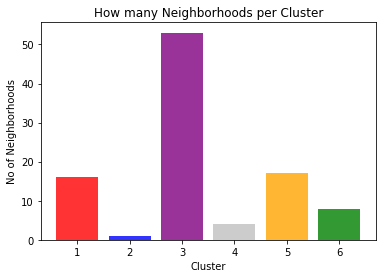

In [65]:
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
performance = coffee['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red','blue','purple','silver','orange','green'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

In [66]:
coffee['Cluster Labels'].value_counts()

2    53
4    17
0    16
5     8
3     4
1     1
Name: Cluster Labels, dtype: int64

In [67]:
Neighborhoods = df_grouped[['Borough', 'Neighborhood']]

In [68]:
Neighborhoods

Borough                                       Neighborhood
0         Scarborough                                     Malvern, Rouge
1         Scarborough             Rouge Hill, Port Union, Highland Creek
2         Scarborough                  Guildwood, Morningside, West Hill
3         Scarborough                                             Woburn
4         Scarborough                                          Cedarbrae
5         Scarborough                                Scarborough Village
6         Scarborough        Kennedy Park, Ionview, East Birchmount Park
7         Scarborough                    Golden Mile, Clairlea, Oakridge
8         Scarborough    Cliffside, Cliffcrest, Scarborough Village West
9         Scarborough                        Birch Cliff, Cliffside West
10        Scarborough  Dorset Park, Wexford Heights, Scarborough Town...
11        Scarborough                                  Wexford, Maryvale
12        Scarborough                                          Agincourt
13        Scarborough            Clarks Corners, Tam O'Shanter, Sullivan
14        Scarborough  Milliken, Agincourt North, Steeles East, L'Amo...
15        Scarborough                      Steeles West, L'Amoreaux West
16        Scarborough                                        Upper Rouge
17         North York                                  Hillcrest Village
18         North York                       Fairview, Henry Farm, Oriole
19         North York                                    Bayview Village
20         North York                           York Mills, Silver Hills
21         North York                            Willowdale, Newtonbrook
22         North York                        Willowdale, Willowdale East
23         North York                                    York Mills West
24         North York                        Willowdale, Willowdale West
25         North York                                          Parkwoods
26         North York                                          Don Mills
27         North York                                          Don Mills
28         North York    Bathurst Manor, Wilson Heights, Downsview North
29         North York                    Northwood Park, York University
..                ...                                                ...
73               York                                 Humewood-Cedarvale
74               York                                Caledonia-Fairbanks
75   Downtown Toronto                                           Christie
76       West Toronto                       Dufferin, Dovercourt Village
77       West Toronto                           Little Portugal, Trinity
78       West Toronto       Brockton, Parkdale Village, Exhibition Place
79         North York           North Park, Maple Leaf Park, Upwood Park
80               York   Del Ray, Mount Dennis, Keelsdale and Silverthorn
81               York                      Runnymede, The Junction North
82       West Toronto                      High Park, The Junction South
83       West Toronto                             Parkdale, Roncesvalles
84       West Toronto                                 Runnymede, Swansea
85   Downtown Toronto        Queen's Park, Ontario Provincial Government
86        Mississauga              Canada Post Gateway Processing Centre
87       East Toronto  Business reply mail Processing Centre, South C...
88          Etobicoke       New Toronto, Mimico South, Humber Bay Shores
89          Etobicoke                             Alderwood, Long Branch
90          Etobicoke      The Kingsway, Montgomery Road, Old Mill North
91          Etobicoke  Old Mill South, King's Mill Park, Sunnylea, Hu...
92          Etobicoke  Mimico NW, The Queensway West, South of Bloor,...
93          Etobicoke            Islington Avenue, Humber Valley Village
94          Etobicoke  West Deane Park, Princess Gardens, Martin Grov...
95          Etobicoke  Eringate, Bloordale Gardens, Old Burnhamthorpe...

In [69]:
yyz_merged.dtypes

Neighborhood         object
Coffee Shop         float64
Cluster Labels        int32
PostalCode           object
Borough              object
BoroughLatitude     float64
BoroughLongitude    float64
VenueName            object
VenueLatitude       float64
VenueLongitude      float64
VenueCategory        object
dtype: object

In [93]:
zero_cluster = yyz_merged.loc[yyz_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(Neighborhoods, zero_cluster, on='Neighborhood')
df_cluster1

Borough_x                                       Neighborhood  \
0      North York                                          Don Mills   
1      North York                                          Don Mills   
2      North York                                          Don Mills   
3      North York                                          Don Mills   
4      North York                                          Don Mills   
5      North York                                          Don Mills   
6      North York                                          Don Mills   
7      North York                                          Don Mills   
8      North York                                          Don Mills   
9      North York                                          Don Mills   
10     North York                                          Don Mills   
11     North York                                          Don Mills   
12     North York                                          Don Mills   
13     North York                                          Don Mills   
14     North York                                          Don Mills   
15     North York                                          Don Mills   
16     North York                                          Don Mills   
17     North York                                          Don Mills   
18     North York                                          Don Mills   
19     North York                                          Don Mills   
20     North York                                          Don Mills   
21     North York                                          Don Mills   
22     North York                                          Don Mills   
23     North York                                          Don Mills   
24     North York                                          Don Mills   
25     North York                                          Don Mills   
26     North York                                          Don Mills   
27     North York                                          Don Mills   
28     North York                                          Don Mills   
29     North York                                          Don Mills   
..            ...                                                ...   
854  West Toronto                                 Runnymede, Swansea   
855  West Toronto                                 Runnymede, Swansea   
856  West Toronto                                 Runnymede, Swansea   
857  West Toronto                                 Runnymede, Swansea   
858  West Toronto                                 Runnymede, Swansea   
859  West Toronto                                 Runnymede, Swansea   
860  West Toronto                                 Runnymede, Swansea   
861  West Toronto                                 Runnymede, Swansea   
862  West Toronto                                 Runnymede, Swansea   
863  West Toronto                                 Runnymede, Swansea   
864  West Toronto                                 Runnymede, Swansea   
865  West Toronto                                 Runnymede, Swansea   
866  West Toronto                                 Runnymede, Swansea   
867  West Toronto                                 Runnymede, Swansea   
868  West Toronto                                 Runnymede, Swansea   
869  West Toronto                                 Runnymede, Swansea   
870  West Toronto                                 Runnymede, Swansea   
871  West Toronto                                 Runnymede, Swansea   
872  West Toronto                                 Runnymede, Swansea   
873  West Toronto                                 Runnymede, Swansea   
874  West Toronto                                 Runnymede, Swansea   
875     Etobicoke  Eringate, Bloordale Gardens, Old Burnhamthorpe...   
876     Etobicoke  Eringate, Bloordale Gardens, Old Burnhamthorpe...   
877     Etobicoke  Eringate, Bloordale Gardens, 

In [71]:
one_cluster =yyz_merged.loc[yyz_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(Neighborhoods, one_cluster, on='Neighborhood')
df_cluster2

Borough_x Neighborhood  Coffee Shop  Cluster Labels PostalCode  \
0  Scarborough       Woburn     0.666667               1        M1G   
1  Scarborough       Woburn     0.666667               1        M1G   
2  Scarborough       Woburn     0.666667               1        M1G   

     Borough_y  BoroughLatitude  BoroughLongitude           VenueName  \
0  Scarborough        43.770992        -79.216917  Korean Grill House   
1  Scarborough        43.770992        -79.216917         Tim Hortons   
2  Scarborough        43.770992        -79.216917           Starbucks   

   VenueLatitude  VenueLongitude      VenueCategory  
0      43.770812      -79.214502  Korean Restaurant  
1      43.770827      -79.223078        Coffee Shop  
2      43.770037      -79.221156        Coffee Shop

In [72]:
two_cluster =yyz_merged.loc[yyz_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(Neighborhoods, two_cluster, on='Neighborhood')
df_cluster3

Borough_x                                       Neighborhood  \
0    Scarborough                                     Malvern, Rouge   
1    Scarborough             Rouge Hill, Port Union, Highland Creek   
2    Scarborough                  Guildwood, Morningside, West Hill   
3    Scarborough                  Guildwood, Morningside, West Hill   
4    Scarborough                  Guildwood, Morningside, West Hill   
5    Scarborough                  Guildwood, Morningside, West Hill   
6    Scarborough                  Guildwood, Morningside, West Hill   
7    Scarborough                  Guildwood, Morningside, West Hill   
8    Scarborough                  Guildwood, Morningside, West Hill   
9    Scarborough                                          Cedarbrae   
10   Scarborough                                          Cedarbrae   
11   Scarborough                                          Cedarbrae   
12   Scarborough                                          Cedarbrae   
13   Scarborough                                          Cedarbrae   
14   Scarborough                                          Cedarbrae   
15   Scarborough                                          Cedarbrae   
16   Scarborough                                          Cedarbrae   
17   Scarborough                                Scarborough Village   
18   Scarborough                                Scarborough Village   
19   Scarborough                                Scarborough Village   
20   Scarborough                    Golden Mile, Clairlea, Oakridge   
21   Scarborough                    Golden Mile, Clairlea, Oakridge   
22   Scarborough                    Golden Mile, Clairlea, Oakridge   
23   Scarborough                    Golden Mile, Clairlea, Oakridge   
24   Scarborough                    Golden Mile, Clairlea, Oakridge   
25   Scarborough                    Golden Mile, Clairlea, Oakridge   
26   Scarborough                    Golden Mile, Clairlea, Oakridge   
27   Scarborough                    Golden Mile, Clairlea, Oakridge   
28   Scarborough                    Golden Mile, Clairlea, Oakridge   
29   Scarborough    Cliffside, Cliffcrest, Scarborough Village West   
..           ...                                                ...   
596    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
597    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
598    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
599    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
600    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
601    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
602    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
603    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
604    Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   
605   North York                                      Humber Summit   
606   North York                                      Humber Summit   
607   North York                                   Humberlea, Emery   
608         York                                             Weston   
609         York                                             Weston   
610    Etobicoke  Kingsview Village, St. Phillips, Martin Grove ...   
611    Etobicoke  Kingsview Village, St. Phillips, Martin Grove ...   
612    Etobicoke  Kingsview Village, St. Phillips, Martin Grove ...   
613    Etobicoke  Kingsview Village, St. Phillips, Martin Grove ...   
614    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
615    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
616    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
617    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
618    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
619    Etobicoke  South Steeles, Silverstone, Humbergate, Jamest...   
620    Etobicoke  South Steeles

In [73]:
three_cluster =yyz_merged.loc[yyz_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(Neighborhoods, three_cluster, on='Neighborhood')
df_cluster4

Borough_x                                 Neighborhood  \
0        Scarborough  Kennedy Park, Ionview, East Birchmount Park   
1        Scarborough  Kennedy Park, Ionview, East Birchmount Park   
2        Scarborough  Kennedy Park, Ionview, East Birchmount Park   
3        Scarborough  Kennedy Park, Ionview, East Birchmount Park   
4        Scarborough  Kennedy Park, Ionview, East Birchmount Park   
5         North York              Northwood Park, York University   
6         North York              Northwood Park, York University   
7         North York              Northwood Park, York University   
8         North York              Northwood Park, York University   
9         North York              Northwood Park, York University   
10        North York                             Victoria Village   
11        North York                             Victoria Village   
12        North York                             Victoria Village   
13        North York                             Victoria Village   
14        North York                             Victoria Village   
15  Downtown Toronto  Queen's Park, Ontario Provincial Government   
16  Downtown Toronto  Queen's Park, Ontario Provincial Government   
17  Downtown Toronto  Queen's Park, Ontario Provincial Government   
18  Downtown Toronto  Queen's Park, Ontario Provincial Government   
19  Downtown Toronto  Queen's Park, Ontario Provincial Government   
20  Downtown Toronto  Queen's Park, Ontario Provincial Government   
21  Downtown Toronto  Queen's Park, Ontario Provincial Government   
22  Downtown Toronto  Queen's Park, Ontario Provincial Government   
23  Downtown Toronto  Queen's Park, Ontario Provincial Government   
24  Downtown Toronto  Queen's Park, Ontario Provincial Government   
25  Downtown Toronto  Queen's Park, Ontario Provincial Government   
26  Downtown Toronto  Queen's Park, Ontario Provincial Government   
27  Downtown Toronto  Queen's Park, Ontario Provincial Government   
28  Downtown Toronto  Queen's Park, Ontario Provincial Government   
29  Downtown Toronto  Queen's Park, Ontario Provincial Government   
30  Downtown Toronto  Queen's Park, Ontario Provincial Government   
31  Downtown Toronto  Queen's Park, Ontario Provincial Government   
32  Downtown Toronto  Queen's Park, Ontario Provincial Government   
33  Downtown Toronto  Queen's Park, Ontario Provincial Government   
34  Downtown Toronto  Queen's Park, Ontario Provincial Government   
35  Downtown Toronto  Queen's Park, Ontario Provincial Government   
36  Downtown Toronto  Queen's Park, Ontario Provincial Government   
37  Downtown Toronto  Queen's Park, Ontario Provincial Government   
38  Downtown Toronto  Queen's Park, Ontario Provincial Government   
39  Downtown Toronto  Queen's Park, Ontario Provincial Government   
40  Downtown Toronto  Queen's Park, Ontario Provincial Government   
41  Downtown Toronto  Queen's Park, Ontario Provincial Government   
42  Downtown Toronto  Queen's Park, Ontario Provincial Government   
43  Downtown Toronto  Queen's Park, Ontario Provincial Government   
44  Downtown Toronto  Queen's Park, Ontario Provincial Government   
45  Downtown Toronto  Queen's Park, Ontario Provincial Government   
46  Downtown Toronto  Queen's Park, Ontario Provincial Government   
47  Downtown Toronto  Queen's Park, Ontario Provincial Government   
48  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Coffee Shop  Cluster Labels PostalCode         Borough_y  BoroughLatitude  \
0      0.200000               3        M1K       Scarborough        43.727929   
1      0.200000               3        M1K       Scarborough        43.727929   
2      0.200000               3        M1K       Scarborough        43.727929   
3      0.200000               3        M1K       Scarborough        43.727929   
4      0.200000               3        M1K       Scarborough        43.727929   
5      0.200000               3        M3J        North York        43.767

In [74]:
four_cluster =yyz_merged.loc[yyz_merged['Cluster Labels'] == 4]
df_cluster5 = pd.merge(Neighborhoods, four_cluster, on='Neighborhood')
df_cluster5

Borough_x                   Neighborhood  Coffee Shop  Cluster Labels  \
0     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
1     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
2     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
3     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
4     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
5     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
6     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
7     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
8     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
9     Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
10    Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
11    Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
12    Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
13    Scarborough  Steeles West, L'Amoreaux West     0.071429               4   
14     North York   Fairview, Henry Farm, Oriole     0.075758               4   
15     North York   Fairview, Henry Farm, Oriole     0.075758               4   
16     North York   Fairview, Henry Farm, Oriole     0.075758               4   
17     North York   Fairview, Henry Farm, Oriole     0.075758               4   
18     North York   Fairview, Henry Farm, Oriole     0.075758               4   
19     North York   Fairview, Henry Farm, Oriole     0.075758               4   
20     North York   Fairview, Henry Farm, Oriole     0.075758               4   
21     North York   Fairview, Henry Farm, Oriole     0.075758               4   
22     North York   Fairview, Henry Farm, Oriole     0.075758               4   
23     North York   Fairview, Henry Farm, Oriole     0.075758               4   
24     North York   Fairview, Henry Farm, Oriole     0.075758               4   
25     North York   Fairview, Henry Farm, Oriole     0.075758               4   
26     North York   Fairview, Henry Farm, Oriole     0.075758               4   
27     North York   Fairview, Henry Farm, Oriole     0.075758               4   
28     North York   Fairview, Henry Farm, Oriole     0.075758               4   
29     North York   Fairview, Henry Farm, Oriole     0.075758               4   
..            ...                            ...          ...             ...   
613  West Toronto       Little Portugal, Trinity     0.046512               4   
614  West Toronto       Little Portugal, Trinity     0.046512               4   
615  West Toronto       Little Portugal, Trinity     0.046512               4   
616  West Toronto       Little Portugal, Trinity     0.046512               4   
617  West Toronto       Little Portugal, Trinity     0.046512               4   
618  West Toronto       Little Portugal, Trinity     0.046512               4   
619  West Toronto       Little Portugal, Trinity     0.046512               4   
620  West Toronto       Little Portugal, Trinity     0.046512               4   
621  West Toronto       Little Portugal, Trinity     0.046512               4   
622  West Toronto       Little Portugal, Trinity     0.046512               4   
623  West Toronto       Little Portugal, Trinity     0.046512               4   
624  West Toronto       Little Portugal, Trinity     0.046512               4   
625  West Toronto       Little Portugal, Trinity     0.046512               4   
626  West Toronto       Little Portugal, Trinity     0.046512               4   
627  West Toronto       Little Portugal, Trinity     0.046512               4   
628  West Toronto         Parkdale, Roncesvalles     0.066667               4   
629  West Toronto         Parkdale, Roncesvalles     0.066667               4   
630  West Toronto         Parkdale, Ron

In [75]:
five_cluster =yyz_merged.loc[yyz_merged['Cluster Labels'] == 5]
df_cluster6 = pd.merge(Neighborhoods, five_cluster, on='Neighborhood')
df_cluster6

Borough_x                                       Neighborhood  \
0          North York                        Willowdale, Willowdale West   
1          North York                        Willowdale, Willowdale West   
2          North York                        Willowdale, Willowdale West   
3          North York                        Willowdale, Willowdale West   
4          North York                        Willowdale, Willowdale West   
5          North York                        Willowdale, Willowdale West   
6     Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
7     Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
8     Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
9     Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
10    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
11    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
12    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
13    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
14    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
15    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
16    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
17    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
18    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
19    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
20    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
21    Central Toronto  Summerhill West, Rathnelly, South Hill, Forest...   
22   Downtown Toronto                          Regent Park, Harbourfront   
23   Downtown Toronto                          Regent Park, Harbourfront   
24   Downtown Toronto                          Regent Park, Harbourfront   
25   Downtown Toronto                          Regent Park, Harbourfront   
26   Downtown Toronto                          Regent Park, Harbourfront   
27   Downtown Toronto                          Regent Park, Harbourfront   
28   Downtown Toronto                          Regent Park, Harbourfront   
29   Downtown Toronto                          Regent Park, Harbourfront   
..                ...                                                ...   
228  Downtown Toronto  Harbourfront East, Union Station, Toronto Islands   
229  Downtown Toronto  Harbourfront East, Union Station, Toronto Islands   
230       Mississauga              Canada Post Gateway Processing Centre   
231       Mississauga              Canada Post Gateway Processing Centre   
232       Mississauga              Canada Post Gateway Processing Centre   
233       Mississauga              Canada Post Gateway Processing Centre   
234       Mississauga              Canada Post Gateway Processing Centre   
235       Mississauga              Canada Post Gateway Processing Centre   
236       Mississauga              Canada Post Gateway Processing Centre   
237       Mississauga              Canada Post Gateway Processing Centre   
238       Mississauga              Canada Post Gateway Processing Centre   
239       Mississauga              Canada Post Gateway Processing Centre   
240       Mississauga              Canada Post Gateway Processing Centre   
241       Mississauga              Canada Post Gateway Processing Centre   
242       Mississauga              Canada Post Gateway Processing Centre   
243         Etobicoke                             Alderwood, Long Branch   
244         Etobicoke                             Alderwood, Long Branch   
245         Etobicoke                             Alderwood, Long Branch   
246         Etobicoke                             Alderwood, Long Branch   
247         Etobicoke                             Alderwood, Long Branch   
248         Etobicoke                             Alderwood,

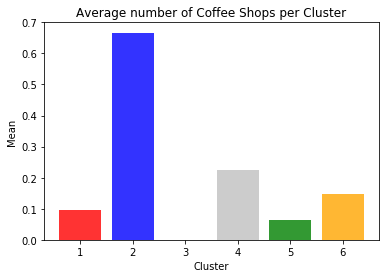

In [76]:
clusters_mean = [df_cluster1['Coffee Shop'].mean(),df_cluster2['Coffee Shop'].mean(),df_cluster3['Coffee Shop'].mean(),
                 df_cluster4['Coffee Shop'].mean(),df_cluster5['Coffee Shop'].mean(),df_cluster6['Coffee Shop'].mean()]
objects = (1,2,3,4,5,6)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red','blue','purple','silver','green','orange'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Coffee Shops per Cluster')

plt.show()

In [77]:
# one hot encoding
yyz_central_onehot_sbux = pd.get_dummies(v_df[['VenueName']], prefix="", prefix_sep="")

# add postal, borough and neighborhood column back to dataframe
yyz_central_onehot_sbux['PostalCode'] = v_df['PostalCode'] 
yyz_central_onehot_sbux['Borough'] = v_df['Borough'] 
yyz_central_onehot_sbux['Neighborhoods'] = v_df['Neighborhood'] 

# move postal, borough and neighborhood column to the first column
fixed_columns_sbux = list(yyz_central_onehot_sbux.columns[-3:]) + list(yyz_central_onehot_sbux.columns[:-3])
yyz_central_onehot_sbux = yyz_central_onehot_sbux[fixed_columns_sbux]

print(yyz_central_onehot_sbux.shape)
yyz_central_onehot_sbux.head()

(2130, 1399)


PostalCode      Borough                           Neighborhoods  \
0        M1B  Scarborough                          Malvern, Rouge   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek   
2        M1E  Scarborough       Guildwood, Morningside, West Hill   
3        M1E  Scarborough       Guildwood, Morningside, West Hill   
4        M1E  Scarborough       Guildwood, Morningside, West Hill   

   (The New) Moksha Yoga Bloor West  2 Bros Cuisine  \
0                                 0               0   
1                                 0               0   
2                                 0               0   
3                                 0               0   
4                                 0               0   

   306 Yonge Street - Jordan Store  360 Restaurant  401 Games  7 Numbers  \
0                                0               0          0          0   
1                                0               0          0          0   
2                                0               0          0          0   
3                                0               0          0          0   
4                                0               0          0          0   

   7-Eleven  ...  famous last words  freshii  iQ Food Co  \
0         0  ...                  0        0           0   
1         0  ...                  0        0           0   
2         0  ...                  0        0           0   
3         0  ...                  0        0           0   
4         0  ...                  0        0           0   

   iQ Food Co. (First Canadian Place)  jane sheppard mall  lululemon  nodo  \
0                                   0                   0          0     0   
1                                   0                   0          0     0   
2                                   0                   0          0     0   
3                                   0                   0          0     0   
4                                   0                   0          0     0   

   souvlaki express  torontochristmastree  金城超級市場 Lucky Moose Food Mart  
0                 0                     0                             0  
1                 0                     0                             0  
2                 0                     0                             0  
3                 0                     0                             0  
4                 0                     0                             0  

[5 rows x 1399 columns]

In [78]:
yyz_central_freq_sbux = yyz_central_onehot_sbux.groupby(['PostalCode', 'Borough', 'Neighborhoods']).mean().reset_index()
print(yyz_central_freq_sbux.shape)
yyz_central_freq_sbux.head()

(99, 1399)


PostalCode      Borough                           Neighborhoods  \
0        M1B  Scarborough                          Malvern, Rouge   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek   
2        M1E  Scarborough       Guildwood, Morningside, West Hill   
3        M1G  Scarborough                                  Woburn   
4        M1H  Scarborough                               Cedarbrae   

   (The New) Moksha Yoga Bloor West  2 Bros Cuisine  \
0                               0.0             0.0   
1                               0.0             0.0   
2                               0.0             0.0   
3                               0.0             0.0   
4                               0.0             0.0   

   306 Yonge Street - Jordan Store  360 Restaurant  401 Games  7 Numbers  \
0                              0.0             0.0        0.0        0.0   
1                              0.0             0.0        0.0        0.0   
2                              0.0             0.0        0.0        0.0   
3                              0.0             0.0        0.0        0.0   
4                              0.0             0.0        0.0        0.0   

   7-Eleven  ...  famous last words  freshii  iQ Food Co  \
0       0.0  ...                0.0      0.0         0.0   
1       0.0  ...                0.0      0.0         0.0   
2       0.0  ...                0.0      0.0         0.0   
3       0.0  ...                0.0      0.0         0.0   
4       0.0  ...                0.0      0.0         0.0   

   iQ Food Co. (First Canadian Place)  jane sheppard mall  lululemon  nodo  \
0                                 0.0                 0.0        0.0   0.0   
1                                 0.0                 0.0        0.0   0.0   
2                                 0.0                 0.0        0.0   0.0   
3                                 0.0                 0.0        0.0   0.0   
4                                 0.0                 0.0        0.0   0.0   

   souvlaki express  torontochristmastree  金城超級市場 Lucky Moose Food Mart  
0               0.0                   0.0                           0.0  
1               0.0                   0.0                           0.0  
2               0.0                   0.0                           0.0  
3               0.0                   0.0                           0.0  
4               0.0                   0.0                           0.0  

[5 rows x 1399 columns]

In [79]:
sbux = yyz_central_freq_sbux[["Neighborhoods","Starbucks"]]
sbux.head(10)
sbux.shape

(99, 2)

In [80]:
kclusters = 6

sbux_clustering = sbux.drop('Neighborhoods', 1)

kmeans_sbux = KMeans(n_clusters=kclusters, random_state=0).fit(sbux_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_sbux.labels_[0:10]

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
sbux_merged = sbux.copy()

# add clustering labels
sbux_merged["Cluster Labels"] = kmeans_sbux.labels_

In [82]:
sbux_merged = sbux_merged.rename(columns={'Neighborhoods':'Neighborhood'})
sbux_merged

Neighborhood  Starbucks  \
0                                      Malvern, Rouge   0.000000   
1              Rouge Hill, Port Union, Highland Creek   0.000000   
2                   Guildwood, Morningside, West Hill   0.000000   
3                                              Woburn   0.333333   
4                                           Cedarbrae   0.000000   
5                                 Scarborough Village   0.000000   
6         Kennedy Park, Ionview, East Birchmount Park   0.000000   
7                     Golden Mile, Clairlea, Oakridge   0.000000   
8     Cliffside, Cliffcrest, Scarborough Village West   0.000000   
9                         Birch Cliff, Cliffside West   0.000000   
10  Dorset Park, Wexford Heights, Scarborough Town...   0.000000   
11                                  Wexford, Maryvale   0.000000   
12                                          Agincourt   0.000000   
13            Clarks Corners, Tam O'Shanter, Sullivan   0.000000   
14  Milliken, Agincourt North, Steeles East, L'Amo...   0.000000   
15                      Steeles West, L'Amoreaux West   0.000000   
16                                  Hillcrest Village   0.000000   
17                       Fairview, Henry Farm, Oriole   0.015152   
18                                    Bayview Village   0.000000   
19                           York Mills, Silver Hills   0.000000   
20                        Willowdale, Willowdale East   0.058824   
21                                    York Mills West   0.000000   
22                        Willowdale, Willowdale West   0.000000   
23                                          Parkwoods   0.000000   
24                                          Don Mills   0.000000   
25                                          Don Mills   0.000000   
26    Bathurst Manor, Wilson Heights, Downsview North   0.050000   
27                    Northwood Park, York University   0.000000   
28                                          Downsview   0.000000   
29                                          Downsview   0.000000   
..                                                ...        ...   
69                   Lawrence Manor, Lawrence Heights   0.000000   
70                                          Glencairn   0.000000   
71                                 Humewood-Cedarvale   0.000000   
72                                Caledonia-Fairbanks   0.000000   
73                                           Christie   0.058824   
74                       Dufferin, Dovercourt Village   0.000000   
75                           Little Portugal, Trinity   0.000000   
76       Brockton, Parkdale Village, Exhibition Place   0.041667   
77           North Park, Maple Leaf Park, Upwood Park   0.000000   
78   Del Ray, Mount Dennis, Keelsdale and Silverthorn   0.000000   
79                      Runnymede, The Junction North   0.000000   
80                      High Park, The Junction South   0.000000   
81                             Parkdale, Roncesvalles   0.000000   
82                                 Runnymede, Swansea   0.000000   
83        Queen's Park, Ontario Provincial Government   0.058824   
84              Canada Post Gateway Processing Centre   0.076923   
85  Business reply mail Processing Centre, South C...   0.000000   
86       New Toronto, Mimico South, Humber Bay Shores   0.000000   
87                             Alderwood, Long Branch   0.000000   
88      The Kingsway, Montgomery Road, Old Mill North   0.000000   
89  Old Mill South, King's Mill Park, Sunnylea, Hu...   0.000000   
90  Mimico NW, The Queensway West, South of Bloor,...   0.000000   
91  Eringate, Bloordale Gardens, Old Burnhamthorpe...   0.111111   
92                                      Humber Summit   0.000000   
93                                   Humberlea, Emery   0.000000   
94                                             Weston   0.000000   
95                                          Westmount   0.142857   
96  Kingsview Village, St. Ph

In [83]:
sbux_merged = sbux_merged.join(v_df.set_index("Neighborhood"), on="Neighborhood", how ='left')

print(sbux_merged.shape)
sbux_merged.head()

(2207, 11)


Neighborhood  Starbucks  Cluster Labels  \
0                          Malvern, Rouge        0.0               1   
1  Rouge Hill, Port Union, Highland Creek        0.0               1   
2       Guildwood, Morningside, West Hill        0.0               1   
2       Guildwood, Morningside, West Hill        0.0               1   
2       Guildwood, Morningside, West Hill        0.0               1   

  PostalCode      Borough  BoroughLatitude  BoroughLongitude  \
0        M1B  Scarborough        43.806686        -79.194353   
1        M1C  Scarborough        43.784535        -79.160497   
2        M1E  Scarborough        43.763573        -79.188711   
2        M1E  Scarborough        43.763573        -79.188711   
2        M1E  Scarborough        43.763573        -79.188711   

               VenueName  VenueLatitude  VenueLongitude         VenueCategory  
0                Wendy’s      43.807448      -79.199056  Fast Food Restaurant  
1  Royal Canadian Legion      43.782533      -79.163085                   Bar  
2         RBC Royal Bank      43.766790      -79.191151                  Bank  
2      G & G Electronics      43.765309      -79.191537     Electronics Store  
2       Big Bite Burrito      43.766299      -79.190720    Mexican Restaurant

In [84]:
sbux_merged.sort_values(["Cluster Labels"], inplace=True)
sbux_merged

Neighborhood  Starbucks  \
47  Summerhill West, Rathnelly, South Hill, Forest...   0.062500   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
20                        Willowdale, Willowdale East   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
..                                                ...        ...   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                           

In [85]:
sbux_merged['VenueName'].value_counts()['Starbucks']

52

In [86]:
sbux_merged

Neighborhood  Starbucks  \
47  Summerhill West, Rathnelly, South Hill, Forest...   0.062500   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
20                        Willowdale, Willowdale East   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
..                                                ...        ...   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                           

In [87]:
sbux_merged['VenueName'] = sbux_merged['VenueName'].astype(str)
sbux_merged

Neighborhood  Starbucks  \
47  Summerhill West, Rathnelly, South Hill, Forest...   0.062500   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
20                        Willowdale, Willowdale East   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
..                                                ...        ...   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                           

In [88]:
list(sbux_merged.VenueName)

['Mary Be Kitchen',
 'Freshslice Pizza',
 "Ten Ren's Tea Time 喫茶新饌",
 'Pho 88 Vietnamese Cuisine',
 'Subway',
 'Kinton Ramen',
 'Boston Pizza',
 'Novotel Toronto North York',
 'Symposium Cafe Restaurant & Lounge',
 'Best Buy',
 'Subway',
 'Starbucks',
 'Dollarama',
 'PetSmart',
 'Aburi Room',
 'Shawarma Max',
 'Wendy’s',
 'PROJECT:FISH',
 "Queen's Quay Terminal",
 'Lake Ontario',
 'BeaverTails',
 'Roundhouse Park',
 'Harbourfront',
 'The Westin Harbour Castle, Toronto',
 'WestJet Stage',
 'Trio Restaurant',
 '360 Restaurant',
 'Glass Floor',
 'Rabba Fine Foods',
 'Starbucks',
 'McCafé',
 'Kellys Landing',
 'Toronto Railway Museum',
 'Toronto Blue Jays Box Office',
 'Ajisen Ramen 味千ラーメン',
 'Aura',
 'Booster Juice',
 'Sobeys Dupont',
 'Loblaws',
 'Faema Caffe',
 'Stubbe Chocolates',
 'Actinolite',
 'Universal Grill',
 'Marlenes Just Babies',
 'Scout and Cash Caffe',
 'Starbucks',
 'Contra Cafe',
 'Fiesta Farms',
 'John Bassett Theatre',
 'SportChek',
 'The Market By Longo’s',
 'Vinny’s P

In [103]:
sbux_merged = sbux_merged.loc[sbux_merged['VenueName'].isin(['Starbucks'])]
sbux_merged.sort_values(['Starbucks'], inplace= True)
sbux_merged

Neighborhood  Starbucks  \
50                               Church and Wellesley   0.013333   
17                       Fairview, Henry Farm, Oriole   0.015152   
51                          Regent Park, Harbourfront   0.022727   
39                       The Danforth West, Riverdale   0.023256   
41                                    Studio District   0.025000   
52                           Garden District, Ryerson   0.030000   
58           Toronto Dominion Centre, Design Exchange   0.030000   
58           Toronto Dominion Centre, Design Exchange   0.030000   
58           Toronto Dominion Centre, Design Exchange   0.030000   
68             First Canadian Place, Underground city   0.030000   
52                           Garden District, Ryerson   0.030000   
52                           Garden District, Ryerson   0.030000   
68             First Canadian Place, Underground city   0.030000   
68             First Canadian Place, Underground city   0.030000   
45                                         Davisville   0.030303   
36                                            Leaside   0.030303   
56                           Richmond, Adelaide, King   0.032609   
56                           Richmond, Adelaide, King   0.032609   
56                           Richmond, Adelaide, King   0.032609   
54                                        Berczy Park   0.035714   
54                                        Berczy Park   0.035714   
59                     Commerce Court, Victoria Hotel   0.040000   
59                     Commerce Court, Victoria Hotel   0.040000   
59                     Commerce Court, Victoria Hotel   0.040000   
59                     Commerce Court, Victoria Hotel   0.040000   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
76       Brockton, Parkdale Village, Exhibition Place   0.041667   
67                                     Stn A PO Boxes   0.041667   
67                                     Stn A PO Boxes   0.041667   
60                  Bedford Park, Lawrence Manor East   0.043478   
55                                 Central Bay Street   0.046875   
55                                 Central Bay Street   0.046875   
55                                 Central Bay Street   0.046875   
44                  North Toronto West, Lawrence Park   0.050000   
26    Bathurst Manor, Wilson Heights, Downsview North   0.050000   
83        Queen's Park, Ontario Provincial Government   0.058824   
73                                           Christie   0.058824   
20                        Willowdale, Willowdale East   0.058824   
20                        Willowdale, Willowdale East   0.058824   
83        Queen's Park, Ontario Provincial Government   0.058824   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
57  Harbourfront East, Union Station, Toronto Islands   0.060000   
47  Summerhill West, Rathnelly, South Hill, Forest...   0.062500   
84              Canada Post Gateway Processing Centre   0.076923   
91  Eringate, Bloordale Gardens, Old Burnhamthorpe...   0.111111   
95                                          Westmount   0.142857   
3                                              Woburn   0.333333   

    Cluster Labels PostalCode           Borough  BoroughLatitude  \
50               1        M4Y  Downtown Toronto        43.665860   
17               4        M2J        North York        43.778517   
51               4        M5A  Downtown Toronto        43.654260   
39               4        M4K      East Toronto        43.679557   
41               4        M4M      East Toronto        43.659526   
52               4        M5

In [90]:
# create map
sbux_clusters = folium.Map(location=[yyz_lat, yyz_lng], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [clr.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, bor, poi, cluster in zip(sbux_merged['BoroughLatitude'], sbux_merged['BoroughLongitude'], sbux_merged['Borough'], sbux_merged['PostalCode']
                                             ,sbux_merged['Neighborhood'], sbux_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(bor, post, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(sbux_clusters)
       
sbux_clusters

In [94]:
df_cluster1['Coffee Shop'].median()

0.1

In [95]:
df_cluster2['Coffee Shop'].median()

0.6666666666666666

In [96]:
df_cluster3['Coffee Shop'].median()

0.0

In [97]:
df_cluster4['Coffee Shop'].median()

0.23529411764705882

In [98]:
df_cluster5['Coffee Shop'].median()

0.0641025641025641

In [99]:
df_cluster6['Coffee Shop'].median()

0.14285714285714285

In [111]:
df_cluster3.Neighborhood.astype(str)

0                                         Malvern, Rouge
1                 Rouge Hill, Port Union, Highland Creek
2                      Guildwood, Morningside, West Hill
3                      Guildwood, Morningside, West Hill
4                      Guildwood, Morningside, West Hill
5                      Guildwood, Morningside, West Hill
6                      Guildwood, Morningside, West Hill
7                      Guildwood, Morningside, West Hill
8                      Guildwood, Morningside, West Hill
9                                              Cedarbrae
10                                             Cedarbrae
11                                             Cedarbrae
12                                             Cedarbrae
13                                             Cedarbrae
14                                             Cedarbrae
15                                             Cedarbrae
16                                             Cedarbrae
17                             

In [112]:
df_cluster3.Neighborhood.unique()

array(['Malvern, Rouge', 'Rouge Hill, Port Union, Highland Creek',
       'Guildwood, Morningside, West Hill', 'Cedarbrae',
       'Scarborough Village', 'Golden Mile, Clairlea, Oakridge',
       'Cliffside, Cliffcrest, Scarborough Village West',
       'Birch Cliff, Cliffside West',
       'Dorset Park, Wexford Heights, Scarborough Town Centre',
       'Wexford, Maryvale', 'Agincourt',
       "Clarks Corners, Tam O'Shanter, Sullivan",
       "Milliken, Agincourt North, Steeles East, L'Amoreaux East",
       'Hillcrest Village', 'Bayview Village', 'York Mills, Silver Hills',
       'York Mills West', 'Parkwoods', 'Don Mills', 'Downsview',
       'Parkview Hill, Woodbine Gardens', 'Woodbine Heights',
       'The Beaches', 'East Toronto, Broadview North (Old East York)',
       'Lawrence Park', 'Davisville North', 'Moore Park, Summerhill East',
       'Rosedale', 'Roselawn',
       'Forest Hill North & West, Forest Hill Road Park',
       'University of Toronto, Harbord',
       'CN Towe